# Departmental and Policy Data

Goal: Calculate correlation between numPolicies and killings and calculate correlation per policy with num killings

In [170]:
import csv
import numpy as np


#read CSV
with open('policydept.csv') as csvfile:
    csvthing = csv.reader(csvfile, delimiter=',')
    total=0
    count=0
    readCSV=[]
    for row in csvthing:
        readCSV.append(row)

    #dictify row 1
    querydict={}
    labels=readCSV[0]
    for el in labels:
        name=el
        querydict[name]=count
        count=count+1
    count=0

    #dictify column 1
    deptdict={}
    for row in readCSV:
        if row[0]!='City':
            dept=row[0]
            deptdict[dept]=count
            count=count+1
    count=0
    
    print(deptdict)
    print(querydict)

{'Albuquerque': 0, 'Anaheim': 1, 'Anchorage': 2, 'Arlington': 3, 'Atlanta': 4, 'Aurora': 5, 'Austin': 6, 'Bakersfield': 7, 'Baltimore': 8, 'Baton Rouge': 9, 'Boston': 10, 'Buffalo': 11, 'Chandler': 12, 'Charlotte': 13, 'Chicago': 14, 'Chula Vista': 15, 'Cincinnati': 16, 'Cleveland': 17, 'Columbus': 18, 'Corpus Christi': 19, 'Dallas': 20, 'Denver': 21, 'Detroit': 22, 'Durham': 23, 'Fort Worth': 24, 'Fremont': 25, 'Fresno': 26, 'Garland': 27, 'Glendale': 28, 'Greensboro': 29, 'Henderson': 30, 'Honolulu': 31, 'Houston': 32, 'Indianapolis': 33, 'Irvine': 34, 'Irving': 35, 'Jacksonville': 36, 'Kansas City Missouri': 37, 'Laredo': 38, 'Las Vegas': 39, 'Lexington': 40, 'Lincoln': 41, 'Los Angeles': 42, 'Louisville': 43, 'Lubbock': 44, 'Madison': 45, 'Mesa': 46, 'Miami': 47, 'Milwaukee': 48, 'Minneapolis': 49, 'Nashville': 50, 'New Orleans': 51, 'New York': 52, 'Newark': 53, 'Norfolk': 54, 'North Las Vegas': 55, 'Oakland': 56, 'Oklahoma City': 57, 'Omaha': 58, 'Orlando': 59, 'Philadelphia': 60

## Correlation with Number of Policies

In [171]:
nps=[]
rates=[]
ratebs=[]
disps=[]
for dept in deptdict.keys():
    print('dept is', dept)
    i=deptdict[dept]+1
    j=querydict['numPolicies']
    nP=int(readCSV[i][j])
    nps.append(nP)
    print('numPolicies is', nP)
    j=querydict['killingsPerMillion']
    rate=float(readCSV[i][j])
    rates.append(rate)
    rateb=float(readCSV[i][querydict['Avg Annual Police Homicide Rate for Black People']])
    ratebs.append(rateb)
    print('police homicide rate is', rate)
    disp=float(readCSV[i][querydict['Black-White Disparity']])+float(readCSV[i][querydict['Hispanic-White Disparity']])
    disps.append(disp)
    print(disp)
    print()

dept is Albuquerque
numPolicies is 5
police homicide rate is 9.2
5.28

dept is Anaheim
numPolicies is 3
police homicide rate is 17.8
12.29

dept is Anchorage
numPolicies is 3
police homicide rate is 10.3
2.07

dept is Arlington
numPolicies is 5
police homicide rate is 8.2
5.4399999999999995

dept is Atlanta
numPolicies is 2
police homicide rate is 9.5
6.79

dept is Aurora
numPolicies is 3
police homicide rate is 18.5
3.4299999999999997

dept is Austin
numPolicies is 3
police homicide rate is 12.7
2.04

dept is Bakersfield
numPolicies is 1
police homicide rate is 20.1
5.27

dept is Baltimore
numPolicies is 2
police homicide rate is 12.9
3.84

dept is Baton Rouge
numPolicies is 2
police homicide rate is 13.1
40.0

dept is Boston
numPolicies is 4
police homicide rate is 4.9
40.0

dept is Buffalo
numPolicies is 3
police homicide rate is 0.0
11.16

dept is Chandler
numPolicies is 3
police homicide rate is 8.5
2.81

dept is Charlotte
numPolicies is 2
police homicide rate is 8.2
4.68999999999

array([[ 1.        , -0.13237558],
       [-0.13237558,  1.        ]])

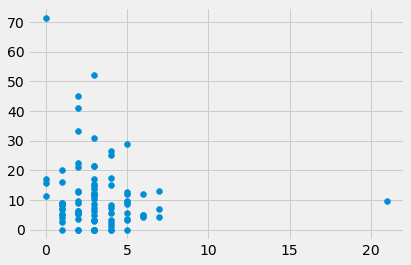

In [172]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

plt.scatter(nps,ratebs)
np.corrcoef(nps,ratebs)

reqDe_esc
[[ 1.         -0.12887582]
 [-0.12887582  1.        ]]
banChoke&Stanglehold
[[ 1.         -0.14752721]
 [-0.14752721  1.        ]]
duty2intervene
[[1.         0.03284774]
 [0.03284774 1.        ]]
warnb4shoot
[[1.         0.05944271]
 [0.05944271 1.        ]]
cantShootVehicles
[[ 1.         -0.08399328]
 [-0.08399328  1.        ]]
reqCompRep
[[ 1.         -0.13546126]
 [-0.13546126  1.        ]]
reqExhOthMeans
[[ 1.         -0.21934268]
 [-0.21934268  1.        ]]
forceContinuum
[[ 1.         -0.09846554]
 [-0.09846554  1.        ]]
numPolicies
[[ 1.         -0.13237558]
 [-0.13237558  1.        ]]


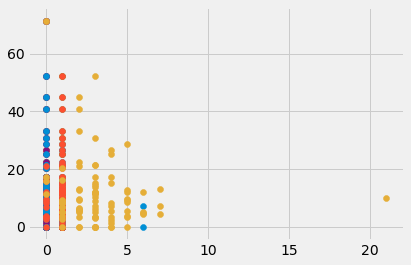

In [173]:
for j in range(32,41):
    policys=[]
    print(readCSV[0][j])
    for dept in deptdict.keys():
        i=deptdict[dept]+1
        nP=int(readCSV[i][j])
        policys.append(nP)
    plt.scatter(policys,ratebs)
    print(np.corrcoef(policys,ratebs))


I restricted to similar cities to avoid noise. It would be ideal to compare a city to itself before the policy but I don't have that data so we use similar cities

In [203]:

def lookAtCities(bigcities,s):
    ratesrestricted=[]
    for dept in bigcities:
        i=deptdict[dept]+1
        query='Avg Annual Police Homicide Rate'+s
        j=querydict[query]
        rate=float(readCSV[i][j])
        ratesrestricted.append(rate)
    for j in range(32,40):
        policys=[]
        print(readCSV[0][j])
        for dept in bigcities:
            i=deptdict[dept]+1
            nP=int(readCSV[i][j])
            policys.append(nP)
        print(np.corrcoef(policys,ratesrestricted))

#comparing similar cities yield higher negative correlation for most policies
print('Looking at rate of black homicides')
lookAtCities(['Los Angeles','San Francisco','Philadelphia','Orlando'],' for Black People')
lookAtCities(['New Orleans','Baton Rouge','Orlando'],' for Black People')

print('Looking at rate of white homicides')
lookAtCities(['Los Angeles','San Francisco','Philadelphia','Orlando'],'')
lookAtCities(['New Orleans','Baton Rouge','Orlando'],'')

Looking at rate of black homicides


KeyError: 'Avg Annual Police Homicide Rate for Black People'

array([[ 1.        , -0.39469219],
       [-0.39469219,  1.        ]])

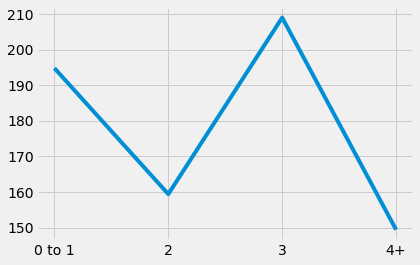

In [175]:
import numpy as np
labels=['0 to 1','2','3','4+']
labelsn=[0,1,2,3]
lowest=0
ok=0
better=0
best=0
for row in readCSV:
    if row[0]!='City':
        nP=int(row[40])
        k=float(row[42])
        if nP<2:
            lowest=lowest+k
        elif nP==2:
            ok=ok+k
        elif nP==3:
            better=better+k
        elif nP>4:
            best=best+k
killings=[lowest,ok,better,best]
plt.plot(labels,killings)
np.corrcoef(labelsn,killings)

# State Specific Data

In [296]:
import csv
#can use rate of death estimates to estimate p-values?

#read csv
with open('states.csv') as csvfile:
    csvthing = csv.reader(csvfile, delimiter=',')
    total=0
    count=0
    readCSV=[]
    for row in csvthing:
        readCSV.append(row)

    #dictify row 1
    querydict={}
    labels=readCSV[0]
    for el in labels:
        name=el
        querydict[name]=count
        count=count+1
    count=0

    #dictify column 1
    statedict={}
    for row in readCSV:
        if row[0]!='State':
            state=row[0]
            statedict[state]=count
            count=count+1
    count=0
    
    print(statedict)
    print(querydict)

{'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'District of Columbia': 8, 'Florida': 9, 'Georgia': 10, 'Hawaii': 11, 'Idaho': 12, 'Illinois': 13, 'Indiana': 14, 'Iowa': 15, 'Kansas': 16, 'Kentucky': 17, 'Louisiana': 18, 'Maine': 19, 'Maryland': 20, 'Massachusetts': 21, 'Michigan': 22, 'Minnesota': 23, 'Mississippi': 24, 'Missouri': 25, 'Montana': 26, 'Nebraska': 27, 'Nevada': 28, 'New Hampshire': 29, 'New Jersey': 30, 'New Mexico': 31, 'New York': 32, 'North Carolina': 33, 'North Dakota': 34, 'Ohio': 35, 'Oklahoma': 36, 'Oregon': 37, 'Pennsylvania': 38, 'Rhode Island': 39, 'South Carolina': 40, 'South Dakota': 41, 'Tennessee': 42, 'Texas': 43, 'Utah': 44, 'Vermont': 45, 'Virginia': 46, 'Washington': 47, 'West Virginia': 48, 'Wisconsin': 49, 'Wyoming': 50}
{'State': 0, 'Population': 1, 'African-American Alone': 2, '% African-American': 3, '% Victims Black': 4, 'Disparity': 5, '# Black people killed': 6, '# Hispan

## Ex.1 Alabama

In [307]:
pb1=float(readCSV[statedict['Alabama']+1][6])/float(readCSV[statedict['Alabama']+1][2].replace(',',''))
print('the probability that someone is killed by an officer given theyre black is',pb1)
#calculating lambda=p*n
print('the rate of killing per 100k is thus',(pb1*100000))
rate1=pb1*100000

whitepop=float(readCSV[statedict['Alabama']+1][17])*int(readCSV[statedict['Alabama']+1][1].replace(',', ''))
pb2=float(readCSV[statedict['Alabama']+1][11])/(whitepop)
print('the probability that someone is killed by an officer given theyre white is',pb2)
#calculating lambda=p*n
print('the rate of killing per 100k is thus',pb2*100000)
rate2=pb2*100000

pb3=(float(readCSV[statedict['Alabama']+1][6])+float(readCSV[statedict['Alabama']+1][7])
    +float(readCSV[statedict['Alabama']+1][8])+float(readCSV[statedict['Alabama']+1][9])
    +float(readCSV[statedict['Alabama']+1][10]))/(int(readCSV[statedict['Alabama']+1][1].replace(',', ''))-whitepop)
print('the probability that someone is killed by an officer given theyre not white is',pb3)
#calculating lambda=p*n
print('the rate of killing per 100k is thus',pb3*100000)
rate3=pb3*100000

bwdisparity =rate1-rate2
print('the black-white disparity is ',bwdisparity)

disparity=rate3-rate2
print('the disparity is ',disparity)


the probability that someone is killed by an officer given theyre black is 3.915893011409634e-05
the rate of killing per 100k is thus 3.9158930114096338
the probability that someone is killed by an officer given theyre white is 2.250663165826681e-05
the rate of killing per 100k is thus 2.250663165826681
the probability that someone is killed by an officer given theyre not white is 3.0767143526213957e-05
the rate of killing per 100k is thus 3.0767143526213956
the black-white disparity is  1.6652298455829526
the disparity is  0.8260511867947145


## Ex.2 Iterating Through States

In [166]:
disparities=[]
for state in statedict.keys():
    print("")
    pb1=float(readCSV[statedict[state]+1][6])/float(readCSV[statedict[state]+1][2].replace(',', ''))
    print('the probability that someone is killed by an officer in',state,'given theyre black is',pb1)
    rate1=pb1*100000
    print('the rate of killing per 100k is thus',rate1)
    
    whitepop=float(readCSV[statedict[state]+1][17])*int(readCSV[statedict[state]+1][1].replace(',', ''))
    pb2=float(readCSV[statedict[state]+1][11])/(whitepop)
    print('the probability that someone is killed by an officer',state,'given theyre white is',pb2)
    rate2=pb2*100000
    print('the rate of killing per 100k is thus',rate2)
    
    pb3=(float(readCSV[statedict[state]+1][6])+float(readCSV[statedict[state]+1][7])
    +float(readCSV[statedict[state]+1][8])+float(readCSV[statedict[state]+1][9])
    +float(readCSV[statedict[state]+1][10]))/(int(readCSV[statedict[state]+1][1].replace(',', ''))-whitepop)
    print('the probability that someone is killed by an officer given theyre not white is',pb3)
    print('the rate of killing per 100k is thus',pb3*100000)
    rate3=pb3*100000
    
    bwdisparity =rate1-rate2
    print('the black-white disparity is ',bwdisparity)
    disparity=rate3-rate2
    disparities.append(disparity)
    print('the disparity is ',disparity)
    print("")


the probability that someone is killed by an officer in Alabama given theyre black is 3.915893011409634e-05
the rate of killing per 100k is thus 3.9158930114096338
the probability that someone is killed by an officer Alabama given theyre white is 2.250663165826681e-05
the rate of killing per 100k is thus 2.250663165826681
the probability that someone is killed by an officer given theyre not white is 3.0767143526213957e-05
the rate of killing per 100k is thus 3.0767143526213956
the black-white disparity is  1.6652298455829526
the disparity is  0.8260511867947145


the probability that someone is killed by an officer in Alaska given theyre black is 0.00017194686841765893
the rate of killing per 100k is thus 17.194686841765893
the probability that someone is killed by an officer Alaska given theyre white is 3.0006399903462487e-05
the rate of killing per 100k is thus 3.0006399903462486
the probability that someone is killed by an officer given theyre not white is 6.137403688341341e-05
the

In [107]:
avg=np.sum(disparities)/len(disparities)
print('national disparity is',avg)

national disparity is 13.214192025732315


# Aggregate Data

In [324]:
with open('aggregate.csv') as csvfile:
    csvthing = csv.reader(csvfile, delimiter=',')
    total=0
    count=0
    readCSV=[]
    for row in csvthing:
        readCSV.append(row)
        
#dictify row 1
    querydict={}
    labels=readCSV[0]
    for el in labels:
        name=el
        querydict[name]=count
        count=count+1
    count=0

    print(querydict)
        

{"\ufeffVictim's name": 0, "Victim's age": 1, "Victim's gender": 2, "Victim's race": 3, 'URL of image of victim': 4, 'Date of Incident (month/day/year)': 5, 'Street Address of Incident': 6, 'City': 7, 'State': 8, 'Zipcode': 9, 'County': 10, 'Agency responsible for death': 11, 'Cause of death': 12, 'A brief description of the circumstances surrounding the death': 13, 'Official disposition of death (justified or other)': 14, 'Criminal Charges?': 15, 'Link to news article or photo of official document': 16, 'Symptoms of mental illness?': 17, 'Unarmed': 18, 'Alleged Weapon (Source: WaPo)': 19, 'Alleged Threat Level (Source: WaPo)': 20, 'Fleeing (Source: WaPo)': 21, 'Body Camera (Source: WaPo)': 22, 'WaPo ID (If included in WaPo database)': 23}


In [325]:
n=1000000
wcount=0
for row in readCSV:
        if row[3]=='White' or row[3]=='white':
            wcount=wcount+1
            
bcount=0
for row in readCSV:
        if row[3]=='Black' or row[3]=='black':
            bcount=bcount+1

ncount=0
for row in readCSV:
        if row[3]=='Unknown Race' or row[3]=='?':
            ncount=ncount+1
tcount=len(readCSV)-1

#prob of police homicide
probPoliceHomicide= tcount/327000000 #P(H)
ratePoliceHomicide=n*probPoliceHomicide 

#prob of police homicide involving someone white
probWHomicide= wcount/327000000 #P(W,H)
rateWHomicide=n*probWHomicide
probHomicidegW=probWHomicide/(0.607) #P(H|W)
rateHomicidegW=n*probHomicidegW

#prob of shooting someone black
probBHomicide= bcount/327000000 #P(B,H)
rateBHomicide=n*probBHomicide
probHomicidegB=probBHomicide/(0.14) #P(B|H)
rateHomicidegB=n*probHomicidegB

print(rateHomicidegW,'police homicides of white people per million in America')
print(rateHomicidegB,'police homicides of black people per million in America')


#prob of police homicide involving someone black and unarmed
ucount=0
for row in readCSV:
    if row[18]=='Unarmed' or row[18]=='unarmed':
        ucount=ucount+1
probUH=ucount/327000000

ucount=0
for row in readCSV:
    if (row[18]=='Unarmed' or row[18]=='unarmed') and (row[3]=='Black' or row[3]=='black'):
        ucount=ucount+1
probBUH=ucount/327000000

probBgUH=probBUH/probHgU

ucount=0
for row in readCSV:
    if row[18]=='Armed' or row[18]=='Allegedly Armed':
        ucount=ucount+1
probAH=ucount/327000000

ucount=0
for row in readCSV:
    if (row[18]=='Armed' or row[18]=='Allegedly Armed') and (row[3]=='Black' or row[3]=='black'):
        ucount=ucount+1
probBAH=ucount/327000000

probBgAH=probBAH/probHgA

probHgU=probUH/probPoliceHomicide
probHgA=probAH/probPoliceHomicide

probB=.14
probU=.99 # approximated, 3 million Americans carry guns daily, more probably carry occasionally/illegally

probBgU=probB*probU

probHgBU=(probBgUH*probHgU)/probBgU
print('probability of a police homicide, given a black unarmed victim is',probHgBU)
print(probHgBU*1000000,'per million')


#prob of police homicide involving someone white and unarmed
ucount=0
for row in readCSV:
    if (row[18]=='Unarmed' or row[18]=='unarmed') and (row[3]=='White' or row[3]=='white'):
        ucount=ucount+1
probWUH=ucount/327000000

probWgUH=probWUH/probHgU

ucount=0
for row in readCSV:
    if (row[18]=='Armed' or row[18]=='Allegedly Armed') and (row[3]=='White' or row[3]=='white'):
        ucount=ucount+1
probWAH=ucount/327000000

probWgAH=probWAH/probHgA

probW=.613

probWgU=probW*probU

probHgWU=(probWgUH*probHgU)/probWgU
print('probability of a police homicide, given a white unarmed victim is',probHgWU)
print(probHgWU*1000000,'per million')

print('the disparity is now even larger as the rate of murder is 4 times larger for unarmed black people')

15.517232692995579 police homicides of white people per million in America
38.663171690694625 police homicides of black people per million in America
probability of a police homicide, given a black unarmed victim is 8.031384178173169e-06
8.03138417817317 per million
probability of a police homicide, given a white unarmed victim is 2.232339811099707e-06
2.232339811099707 per million
the disparity is now even larger as the rate of murder is 4 times larger for unarmed black people


We can visualize these distributions:

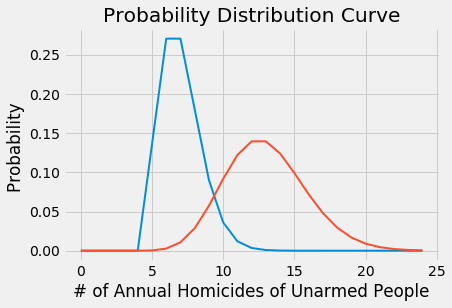

In [326]:
from scipy.stats import poisson

w=poisson(2)
b=poisson(8)
arr=[]
for num in range(-5,20):
    arr.append(w.pmf(num))
prob1 = w.pmf(5)
plt.grid(True)
plt.ylabel('Probability ')
plt.xlabel('# of Annual Homicides of Unarmed People')
plt.title('Probability Distribution Curve')
plt.plot(arr, linewidth=2.0)

arr2=[]
for num in range(-5,20):
    arr2.append(b.pmf(num))
prob2 = b.pmf(12)
plt.grid(True)
plt.plot(arr2, linewidth=2.0)

In [335]:
probHgB=probHomicidegB
probHgW=probHomicidegW
probHgBA=probHgB-probHgBU
probHgWA=probHgW-probHgWU

def probHomicide(b,w,u):
    if u==1:
        if b==1:
            return probHgBU
        elif w==1:
            return probHgWU
        else:
            return probHgU
    else:
        if b==1:
            return probHgBA
        elif w==1:
            return probHgWA
        else:
            return probHgA

counter=0
for row in readCSV:
    if "Charged" in str(row[15]):
        counter=counter+1
pCH=counter/327000000
probCgH=pCH/probPoliceHomicide
print(probCgH, 'is the percentage of officers charged with shootings')

#assumes homicide occurs, since makeSample only runs this if homicide=1
for row in readCSV:
    if ("Charged" in str(row[15])) and (row[3]=='Black' or row[3]=='black') and (row[18]=='Unarmed' or row[18]=='unarmed'):
        counter=counter+1
probCBU=counter/327000000

for row in readCSV:
    if ("Charged" in str(row[15])) and (row[3]=='White' or row[3]=='white') and (row[18]=='Unarmed' or row[18]=='unarmed'):
        counter=counter+1
probCWU=counter/327000000

for row in readCSV:
    if ("Charged" in str(row[15])) and (row[18]=='Unarmed' or row[18]=='unarmed'):
        counter=counter+1
probCU=counter/327000000

for row in readCSV:
    if ("Charged" in str(row[15])) and (row[3]=='Black' or row[3]=='black') and (row[18]=='Allegedly Armed' or row[18]=='Armed'):
        counter=counter+1
probCBA=counter/327000000

for row in readCSV:
    if ("Charged" in str(row[15])) and (row[3]=='White' or row[3]=='white') and (row[18]=='Allegedly Armed' or row[18]=='Armed'):
        counter=counter+1
probCWA=counter/327000000

for row in readCSV:
    if ("Charged" in str(row[15])) and (row[18]=='Allegedly Armed' or row[18]=='Armed'):
        counter=counter+1
probCA=counter/327000000

probCgBU=probCBU/(probU*probB)
probCgWU=probCWU/(probU*probW)
probCgU=probCU/probU

probCgBA=probCBA/((1-probU)*probB)
probCgWA=probCWA/((1-probU)*probW)
probCgA=probCA/(1-probU)

#again assumes homicide occurs, since makeSample only runs this if homicide=1
def probCharges(black,white,unarmed):
    counter=0
    if unarmed==1:
        #P(C,B=1,W=0,U=1)/P(B=1,W=0,U=1)
        if black==1:
            return probCgBU
        #P(C,B=0,W=1,U=1)/P(B=0,W=1,U=1)
        elif white==1:
            return probCgWU
        #P(C,B=0,W=0,U=1)/P(B=0,W=0,U=1)
        else:
            return probCgU
    else:
        #P(C,B=1,W=0,U=0)/P(B=1,W=0,U=0)
        if black==1:
            return 
        #P(C,B=0,W=1,U=0)/P(B=0,W=1,U=0)
        elif white==1:
            return 
        #P(C,B=0,W=0,U=0)/P(B=0,W=0,U=0)
        else:
            return 

0.01623756582796957 is the percentage of officers charged with shootings


It becomes very difficult to model with different parameters after the addition of the charges event, so we need some way to model this Bayesian network of events. Joint sampling works well.

In [330]:
# joint sampling 
def bern(p):
    event = random.random() < p
    if event: return 1
    else: return 0
    
def makeSample():
    observation=[]
    unarmed = bern(0.99)
    black = bern(0.14)
    if black!=1:
        white=bern(.613)
    else:
        white=0
    homicide=bern(probHomicide(black,white,unarmed))
    if homicide==1:
        charges=bern(probCharges(black,white,unarmed))
    else:
        charges=0
    observation = [unarmed,black,white,homicide,charges]
    return observation
    
def makeSamples(n):
    samples=[]
    for i in range(n):
        samples.append(makeSample())
    return samples        

samples=makeSamples(100000000)

[[1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 0,

In [334]:
def probFlu(): #P(H = 1 | Exposure = 1 and X2 = 1)
    samples=makeSamples(10000)
    keptsamples = []
    for s in samples:
        if (s[4]==0 and s[1]==1):
            keptsamples.append(s)
    total = len(keptsamples)
    count=0
    for s in keptsamples:
        if s[2]==0:
            count=count+1
    return count/total

print(prob)

1.0


# UNFINISHED WORK

# P-values?

In [39]:
# we can now calcualte p-values for a national disparity?
# that would require two generated samples of b/w populations
# and drawing out 
import random
def pvalue(universalSample,hopes):
    s=universalSample
    n=wcount
    m=tcount-wcount
    count=0
    for i in range(10000):
        r1=random.choices(s,k=n)
        sum1=0
        for i in r1:
            sum1=sum1+int(i)
        r2=random.choices(s,k=m)
        sum2=0
        for i in r2:
            sum2=sum2+int(i)
        rate1=sum1/float(n)
        rate2=sum2/float(m)
        ratediff=abs(rate1-rate2)
        if ratediff>hopes:
            count=count+1
    return count/10000

print(pvalue(np.ones(tcount),13.214192025732315))

0.0


# Creating a GUI for a Probability Calculator

In [168]:
import PySimpleGUI as sg

layout = [ [sg.Txt('Enter values to calculate')],      
           [sg.In(size=(8,1), key='numerator')],      
           [sg.Txt('_'  * 10)],      
           [sg.In(size=(8,1), key='denominator')],      
           [sg.Txt('', size=(8,1), key='output')  ],      
           [sg.Button('Calculate', bind_return_key=True)]]

window = sg.Window('Math', layout)

while True:      
    event, values = window.Read()

    if event is not None:      
        try:      
            numerator = float(values['numerator'])      
            denominator = float(values['denominator'])      
            calc = numerator / denominator      
        except:      
            calc = 'Invalid'

        window.Element('output').Update(calc)      
    else:      
        break